In [1]:
import sys
sys.path.insert(0, "../")


from qDenseCNN import qDenseCNN
from denseCNN import denseCNN

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib

from martinModels import models
import graphUtil
import numba
import pickle

from plotWafer import plotWafer

from train import OverlayPlots,emd,d_weighted_mean,d_abs_weighted_rms

/cvmfs/cms.cern.ch/slc7_amd64_gcc820/external/py2-numba/0.47.0/lib/python3.8/site-packages/numba/__init__.py:105: UserWarning: llvmlite version format not recognized!
  warnings.warn("llvmlite version format not recognized!")


In [2]:
models[0]

{'name': 'Sep21_CNN_keras_SepConv_v1',
 'label': 'SepConv',
 'isDense2D': True,
 'pams': {'CNN_layer_nodes': [8],
  'CNN_kernel_size': [3],
  'CNN_pool': [False],
  'shape': (4, 4, 3),
  'channels_first': False,
  'arrange': array([ 0, 16, 32,  1, 17, 33,  2, 18, 34,  3, 19, 35,  4, 20, 36,  5, 21,
         37,  6, 22, 38,  7, 23, 39,  8, 24, 40,  9, 25, 41, 10, 26, 42, 11,
         27, 43, 12, 28, 44, 13, 29, 45, 14, 30, 46, 15, 31, 47]),
  'encoded_dim': 16,
  'loss': 'telescopeMSE',
  'nBits_input': {'total': 10, 'integer': 3, 'keep_negative': 1},
  'nBits_accum': {'total': 11, 'integer': 3, 'keep_negative': 1},
  'nBits_weight': {'total': 5, 'integer': 1, 'keep_negative': 1}},
 'isQK': False,
 'ws': ''}

In [3]:
from dense2DkernelCNN import dense2DkernelCNN
for model in models[-3:]:
    m = dense2DkernelCNN()
    m.setpams(model['pams'])
    m.init(False)
    ae, en = m.get_models()
    print(model['name'])
    en.summary()

Sep21_CNN_keras_SepConv_v1
Model: "encoder"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 4, 4, 3)]    0                                            
__________________________________________________________________________________________________
lambda_1 (Lambda)               (None, 4, 4, 1)      0           input_1[0][0]                    
__________________________________________________________________________________________________
lambda_2 (Lambda)               (None, 4, 4, 1)      0           input_1[0][0]                    
__________________________________________________________________________________________________
lambda_3 (Lambda)               (None, 4, 4, 1)      0           input_1[0][0]                    
_________________________________________________________________

In [2]:
def OverlayPlots(results, name, xtitle="",ytitle="Entries",odir='.',text="", ylim=None):
    #print('overlay: ',name)
    centers = results[0][1][0]
    wid = centers[1]-centers[0]
    offset = 0.33*wid

    plt.figure(figsize=(6,4))

    for ir,r in enumerate(results):
        lab = r[0]
        dat = r[1]
        off = offset * (ir-1)/2 * (-1. if ir%2 else 1.) # .1 left, .1 right, .2 left, ...
        plt.errorbar(x=dat[0]+off, y=dat[1], yerr=dat[2], label=lab)
        #plt.errorbar(x=r[0], y=r[1], yerr=r[2], linestyle='none', marker='.', label=leg)

                 
    ax = plt.gca()
    plt.text(0.1, 0.9, name, transform=ax.transAxes)
    if text: plt.text(0.1, 0.82, text.replace('MAX','inf'), transform=ax.transAxes)
    plt.xlabel(xtitle)
    plt.ylabel(ytitle)
    if ylim is not None:
        plt.ylim(ylim[0],ylim[1])
    plt.legend(loc='upper right')
    #if logy: plt.yscale('log')
    pname = odir+"/"+name+".pdf"
    plt.show()
    plt.close()

In [3]:
def loadPickles(flist):
    perf_dict = {}
    for f in flist:
        with open(f,'rb') as f_pkl:
            d = pickle.load(f_pkl)
            for k in d.keys():
                if k in perf_dict.keys():
#                     print(k)            
#                     print(perf_dict.keys())
#                    d[k+"_new"] = d.pop(k)
                    perf_dict[k+'_new']= d[k]                
                else:
                    perf_dict.update( d)
    return perf_dict

In [182]:
flist = [
      "../V11/signal/nElinks_5/Sep26_SepConv_663_pool/performance_Sep26_SepConv_663_pool.pkl",    
      "../V11/signal/nElinks_5/Sep29_SepConv_663_pool/performance_Sep29_SepConv_663_pool.pkl", 
        ]
p = loadPickles(flist)
p.keys()

dict_keys(['SepConv_663_pool', 'SepConv_663_pool_new'])

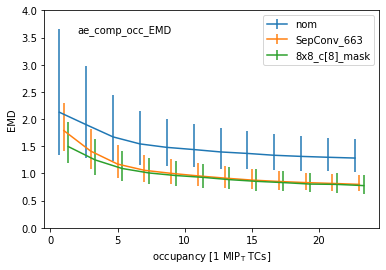

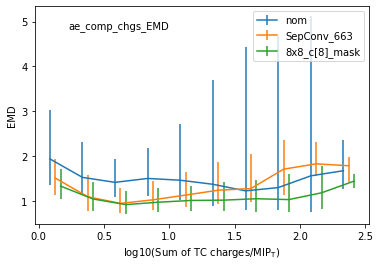

In [256]:
flist = [
     "../V11/signal/nElinks_5/Sep1_CNN_keras_norm/performance_Sep1_CNN_keras_norm.pkl",
#     "../V11/signal/nElinks_5/Sep26_663/performance_Sep26_663.pkl",
       "../V11/signal/nElinks_5/Sep26_SepConv_663/performance_Sep26_SepConv_663.pkl",    
#     "../V11/signal/nElinks_5/Sep21_CNN_keras_SepConv_v1/performance_Sep21_CNN_keras_SepConv_v1.pkl",    
# #     "../V11/signal/nElinks_5/Sep21_CNN_keras_SepConv_v3/performance_Sep21_CNN_keras_SepConv_v3.pkl",    
#        "../V11/signal/nElinks_5/Sep26_SepConv_663_pool/performance_Sep26_SepConv_663_pool.pkl",    
#      "../V11/signal/nElinks_5/Sep29_SepConv_663_pool/performance_Sep29_SepConv_663_pool.pkl",
#       "../V11/signal/nElinks_5/Sep29_SepConv_663_pool_v2/performance_Sep29_SepConv_663_pool_v2.pkl",    

#     "../V11/signal/nElinks_5/Sep21_CNN_keras_SepConv_v1/performance_Sep21_CNN_keras_SepConv_v1.pkl",    
#     "../V11/signal/nElinks_5/Sep21_CNN_keras_SepConv_v2/performance_Sep21_CNN_keras_SepConv_v2.pkl",        
#     "../V11/signal/nElinks_5/Sep21_CNN_keras_SepConv_v3/performance_Sep21_CNN_keras_SepConv_v3.pkl",        

#       "../V11/signal/nElinks_5/Sep9_CNN_keras_8x8_v1/performance_Sep9_CNN_keras_8x8_v1.pkl",     
#      "../V11/signal/nElinks_5/Sep9_CNN_keras_8x8_v2/performance_Sep9_CNN_keras_8x8_v2.pkl",     
#     "../V11/signal/nElinks_5/Sep9_CNN_keras_8x8_v7.2/performance_Sep9_CNN_keras_8x8_v7.2.pkl",  
    
       "../V11/signal/nElinks_5/Sep9_CNN_keras_8x8_v7/performance_Sep9_CNN_keras_8x8_v7.pkl", #8x8_c8_mask   
#      "../V11/signal/nElinks_5/Sep9_CNN_keras_8x8_v10/performance_Sep9_CNN_keras_8x8_v10.pkl",        
#      "../V11/signal/nElinks_5/Sep9_CNN_keras_8x8_v11/performance_Sep9_CNN_keras_8x8_v11.pkl",    
    
#        "../V11/signal/nElinks_5/Sep9_CNN_keras_8x8_v7.2/performance_Sep9_CNN_keras_8x8_v7.2.pkl",    
#       "../V11/signal/nElinks_5/Sep9_CNN_keras_8x8_v8.2/performance_Sep9_CNN_keras_8x8_v8.2.pkl",        
#        "../V11/signal/nElinks_5/Sep9_CNN_keras_8x8_v9.2/performance_Sep9_CNN_keras_8x8_v9.2.pkl",    

    
#      "../V11/signal/nElinks_5/Sep9_CNN_keras_8x8_v1/performance_Sep9_CNN_keras_8x8_v1.pkl", 
#      "../V11/signal/nElinks_5/Sep9_CNN_keras_8x8_v10/performance_Sep9_CNN_keras_8x8_v10.pkl",    
#     "../V11/signal/nElinks_5/Sep9_CNN_keras_8x8_v11/performance_Sep9_CNN_keras_8x8_v11.pkl",    

#      "../V11/signal/nElinks_5/Sep9_CNN_keras_8x8_v4/performance_Sep9_CNN_keras_8x8_v4.pkl",        
#      "../V11/signal/nElinks_5/Sep9_CNN_keras_8x8_v5/performance_Sep9_CNN_keras_8x8_v5.pkl",
#      "../V11/signal/nElinks_5/Sep9_CNN_keras_8x8_v6/performance_Sep9_CNN_keras_8x8_v6.pkl"
]
plot(flist)

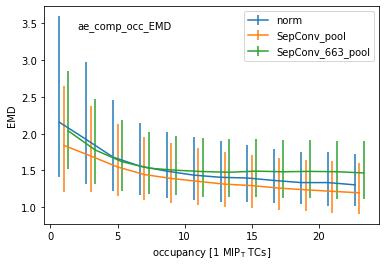

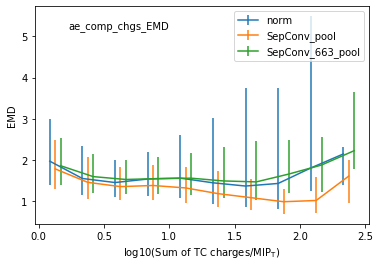

In [99]:
flist = [
    "../V11/signal/nElinks_5/Sep1_CNN_keras_norm/performance_Sep1_CNN_keras_norm.pkl",
#    "../V11/signal/nElinks_5/Sep21_CNN_keras_SepConv_v1/performance_Sep21_CNN_keras_SepConv_v1.pkl",    
    "../V11/signal/nElinks_5/Sep21_CNN_keras_SepConv_v3/performance_Sep21_CNN_keras_SepConv_v3.pkl",    
#     "../V11/signal/nElinks_5/Sep26_SepConv_663/performance_Sep26_SepConv_663.pkl", 
     "../V11/signal/nElinks_5/Sep26_SepConv_663_pool/performance_Sep26_SepConv_663_pool.pkl",        
]
plot(flist)

In [6]:
flist = [
    "../V11/signal/nElinks_5/Sep1_CNN_keras_norm/performance_Sep1_CNN_keras_norm.pkl",
#    "../V11/signal/nElinks_5/Sep21_CNN_keras_SepConv_v1/performance_Sep21_CNN_keras_SepConv_v1.pkl",    
#    "../V11/signal/nElinks_5/Sep21_CNN_keras_SepConv_v3/performance_Sep21_CNN_keras_SepConv_v3.pkl",    
#     "../V11/signal/nElinks_5/Sep30_SepConv_663/performance_Sep30_SepConv_663.pkl", 
     "../V11/signal/nElinks_5/Sep30_SepConv_663_c4/performance_Sep30_SepConv_663_c4.pkl",     
#     "../V11/signal/nElinks_5/Sep30_SepConv_663_c2/performance_Sep30_SepConv_663_c2.pkl",         
#     "../V11/signal/nElinks_5/Sep26_SepConv_663_pool/performance_Sep26_SepConv_663_pool.pkl",        
     "../V11/signal/nElinks_5/Sep30_SepConv_663_c4_pool/performance_Sep30_SepConv_663_c4_pool.pkl",         
]
plot(flist)

FileNotFoundError: [Errno 2] No such file or directory: '../V11/signal/nElinks_5/Sep30_SepConv_663_c4_pool/performance_Sep30_SepConv_663_c4_pool.pkl'

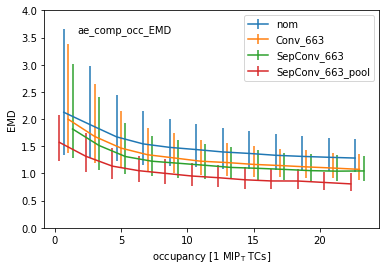

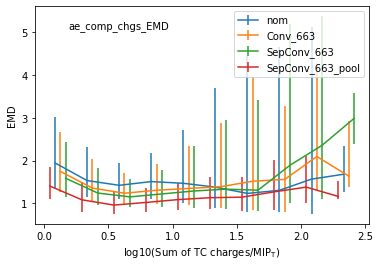

In [258]:
flist = [
    "../V11/signal/nElinks_5/Sep1_CNN_keras_norm/performance_Sep1_CNN_keras_norm.pkl",
#    "../V11/signal/nElinks_5/Sep28_CNN_keras_norm/performance_Sep1_CNN_keras_norm.pkl",
     "../V11/signal/nElinks_5/Sep30_663/performance_Sep30_663.pkl",
     "../V11/signal/nElinks_5/Sep30_SepConv_663/performance_Sep30_SepConv_663.pkl", 
     "../V11/signal/nElinks_5/Sep30_SepConv_663_pool/performance_Sep30_SepConv_663_pool.pkl",        
]
plot(flist)

In [5]:
def plot(flist):
    perf_dict = loadPickles(flist)
    eval_settings={
        # compression algorithms, autoencoder and more traditional benchmarks
        'algnames' : ['ae','stc','thr_lo','thr_hi','bc'],
        # metrics to compute on the validation dataset
        'metrics' : {
            'EMD'      :emd,
            #'dMean':d_weighted_mean,
            #'dRMS':d_abs_weighted_rms,
        },
        "occ_nbins"   :12,
        "occ_range"   :(0,24),
        "occ_bins"    : [0,2,5,10,15],
        "chg_nbins"   :20,
        "chg_range"   :(0,200),
        "chglog_nbins":10,
        "chglog_range":(0,2.5),
        "chg_bins"    :[0,2,5,10,50],
        "occTitle"    :r"occupancy [1 MIP$_{\mathrm{T}}$ TCs]"       ,
        "logMaxTitle" :r"log10(Max TC charge/MIP$_{\mathrm{T}}$)",
        "logTotTitle" :r"log10(Sum of TC charges/MIP$_{\mathrm{T}}$)",
        'ylim'        :None,
    }
    metrics = eval_settings['metrics']

    for mname in metrics:
        chgs=[]
        occs=[]
        for model_name in perf_dict:
#            print(model_name)
            plots = perf_dict[model_name]
            occs += [(model_name, plots["occ_"+mname+"_ae"])]
            chgs += [(model_name, plots["chg_"+mname+"_ae"])]        
        ylim_occ = (0,4)
        ylim_chg = None        
        OverlayPlots(occs,"ae_comp_occ_"+mname,xtitle=eval_settings['occTitle'],ytitle=mname,ylim=ylim_occ)
        OverlayPlots(chgs,"ae_comp_chgs_"+mname,xtitle=eval_settings['logTotTitle'],ytitle=mname,ylim=ylim_chg)

In [21]:
m = denseCNN()
m.init()

Model: "encoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_13 (InputLayer)        [(None, 4, 4, 3)]         0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 4, 4, 8)           224       
_________________________________________________________________
flatten_12 (Flatten)         (None, 128)               0         
_________________________________________________________________
encoded_vector (Dense)       (None, 16)                2064      
Total params: 2,288
Trainable params: 2,288
Non-trainable params: 0
_________________________________________________________________
Model: "decoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
decoder_input (InputLayer)   [(None, 16)]              0         
________________________________________

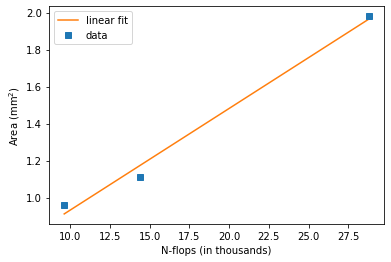

In [103]:
import numpy as np
x = np.array([9.610, 14.412, 28.780])
y = np.array([ 0.96,1.11,1.98])
m, b = np.polyfit(x, y, 1)

plt.tight_layout()

plt.errorbar(x=x, y=y,marker='s',label='data',ls='')
plt.plot(x, m*x + b,label='linear fit')
plt.xlabel('N-flops (in thousands)')
plt.ylabel('Area (mm$^{2}$)')
plt.legend(loc='best')


nom dict_keys(['loss', 'val_loss'])
SepConv663 dict_keys(['loss', 'val_loss'])
SepConv663_pool dict_keys(['loss', 'val_loss'])
8x8_c[8] dict_keys(['loss', 'val_loss'])
8x8_c[8]_pool dict_keys(['loss', 'val_loss'])


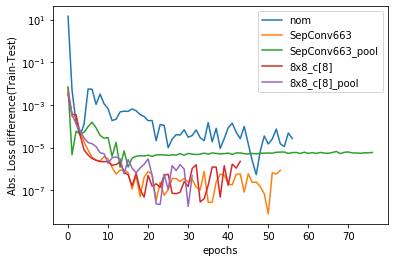

In [255]:
def loadhistory(flist):
    perf_dict = {}
    for f in flist:
        with open(f['f'],'rb') as f_pkl:
            d = pickle.load(f_pkl)
            perf_dict[f['label']] = d
    return perf_dict

def plothistory(hist_dict,diff=False):
    
    linestyles  = ['solid','-', '--', '-.', ':']
    for i,(label,data) in enumerate(hist_dict.items()):
        print(label,data.keys())
        if diff:
            plt.plot(np.abs(np.array(data['loss'])-np.array(data['val_loss'])),label=label)      
        else:
            plt.plot(data['loss']    ,ls=linestyles[i],c='tab:blue',label=label+"_train")
            plt.plot(data['val_loss'],ls=linestyles[i],c='tab:orange',label=label+"_test")     
            

        
    plt.xlabel('epochs')
    if diff:
        plt.ylabel('Abs. Loss difference(Train-Test)')        
    else:
        plt.ylabel('Loss')
    
#     if ylim is not None:
#         plt.ylim(ylim[0],ylim[1])
    plt.legend(loc='upper right')        
    plt.yscale('log')
    
basepath ='../V11/signal/nElinks_5/'    
flist = [
      {'label':'nom', 'f':basepath+"Sep1_CNN_keras_norm/history_Sep1_CNN_keras_norm.pkl"},
     {'label':'SepConv663',      'f':basepath+"Sep26_SepConv_663/history_Sep26_SepConv_663.pkl", },    
     {'label':'SepConv663_pool', 'f':basepath+"Sep26_SepConv_663_pool/history_Sep26_SepConv_663_pool.pkl", },    
     {'label':'8x8_c[8]',      'f':basepath+"Sep9_CNN_keras_8x8_v1/history_Sep9_CNN_keras_8x8_v1.pkl", },    
     {'label':'8x8_c[8]_pool', 'f':basepath+"Sep9_CNN_keras_8x8_v7.2/history_Sep9_CNN_keras_8x8_v7.2.pkl", },    

    
]
p = loadhistory(flist)
plothistory(p,True)
#plothistory(p,False)